# Логистическая регрессия

## Задача классификации

Рассмотренные ранее регрессионные модели подразумевают, что целевая переменная $Y$ является *количественной*. Однако, зачастую независимая переменная является *качественной*.
Например, цвет глаз - качественная переменная.
Часто качественные переменные называют *категориальными* (эти термины взаимозаменяемы). Предсказание качественного отклика для некоторого наблюдения можно назвать классификацией, поскольку это наблюдение относят к определенной категории (классу). 

С другой стороны, методы классификации часто в качестве основы для выполнения классификации сначала предсказывают вероятность каждой из категорий качественной переменной и в этом смысле они ведут себя подобно методам регрессии.

**Примеры задач классификации:**
* Определить, входящий e-mail спам, или нет?
* Определить, является ли банковская транзакция мошеннической, или нет?
* Определить, опухоль является злокачественной или доброкачественной?

Что объединяет примеры выше?
У всех этих примеров ответ целевой переменной да или нет. Таким образом, $Y = \{0,1\}$, т.е. мы имеем дело с **бинарной классификацией**.
Т.е. 
* $Y = 1$ - позитивный класс (Positive class) - часто выражает присутствие чего-либо;
* $Y = 0$ - негативный класс (Negative class) - часто выражает отсутствие чего-либо;

Мы начнем рассмотрение бинарной классификации, и затем рассмотрим многоклассовую классификацию (хотя, по своей сути она просто расширение бинарной классификации).



# Наивный Байесовский классификатор

Наивная Байесовская классификация - один из самых элегантных практически используемых алгоритмов машинного обучения. Он является мощным и эффективным инструментов по качеству результата.

* Устойчив к нерелевантным признакам, которые просто игнорирует
* Быстро обучается и быстро возвращает предсказание
* Потребляет относительно небольшое число ресурсов

В чем же наивность?

Наивность относится к предположению, необходимому для оптимальной работы классификатора. Состоит оно в том, что признаки не влияют друг на друга. В реальности такое бывает крайне редко, но на практике верность этого алгоритма достаточно выскоа, даже если предположение о независимости признаков не оправдывается.


## Теорема Байеса

По сути, наивная Байесовская классификация - не что иное, как отслеживание того, какой признак о каком классе свидетельствует. Способ проектирования признаков определяет модель, используемую для обучения.

Например, в **модели Бернулли** допускаются только буоевские признаки (встречается слово один или несколько раз не имеет значения). В мультиномиальной модели признаками являются счетчики слов.

Пока рассмотрим модель Бернулли, чтобы объяснить как наивный Байесовский классификатор используется для анализа эмоциональной окраски текста. А для обучения и настройки реальных классификаторов (позже) перейдем на **мультиномиальную модель**.

Итак, пусть:
* $C$ - Класс твита (положительный или отрицательный);
* $F_1$ - В твите хотя бы раз встречается слово awesome;
* $F_2$ - В твите хоть раз встречается слово crazy

В ходе обучения мы построили наивную Байесовскую модель, которая возвращает вероятность класса $C$, если известны признаки $F_1$ и $F_2$. Эта вероятность записывается в виде $\Pr(C\mid F_1, F_2)$.

Поскольку мы не можем оценить  $\Pr(C\mid F_1, F_2)$ непосредственно, то применим формулу, изобретенную Байесом:
 $$\Pr(B)\times\Pr(B\mid A) = \Pr(A)\times\Pr(A\mid B)$$ или $$ \Pr(B \mid A) = \frac{\Pr(A)\times\Pr(A \mid B)}{\Pr(B)}$$
 
Если считать, что $A$ - событие.ю состоящее во вхождении обоих слов awesome и crazy, а $B$ - принадлежность твита классу $C$, то получится формула, которая впоследствии может помочь нам вычислить вероятность принадлежности образца к указанному классу:

$$\Pr(F_1, F_2) \times \Pr(C\mid F_1, F_2) = \Pr(C)\times\Pr(F_1, F_2\mid C).$$

Это позволяет выразить $\Pr(C\mid F_1, F_2)$ через другие вероятности:

$$\Pr(C\mid F_1, F_2) = \frac{\Pr(C)\times \Pr(F_1, F_2\mid C)}{\Pr(F_1, F_2)}$$

Можно и записать в таком виде:

$$prior = \frac{posterior \times likelihood}{evidence}$$

$prior$ м $evidence$ найти легко:
* $P(C)$ - априорная вероятность класса без каких-либо знаний о данных. Оценить её можно напрямую подсчитав долю обучающих примеров, принадлежащих данному классу.
* $P(F_1, F_2)$ - свидетельство, или вероятность одновременного наличия признаков $F_1$ и  $F_2$.

Нетривиальная часть - вычисление правдоподобия (likelihood) $\Pr(F_1, F_2\mid C)$. Эта величина говорит о том, насколько вероятно увидеть признаки $F_1$ и  $F_2$, если мы знаем, что образец принадлежит классу $C$. 

## Предположение о наивности
Из теории вероятностей:
$$ \Pr(F_1, F_2 \mid C) = \Pr(F_1 \mid C) \times \Pr(F_2 \mid C, F_1).$$

Сама по себе формула мало что дает, поскольку мы заменяем одну трудную задачу - поиск $\Pr(F_1, F_2 \mid C)$ другой, не менее трудной - оценка $ \Pr(F_2 \mid C, F_1)$.

Однако, если наивно предположить, что $F_1$ и $F_2$ независимы, то $ \Pr(F_2 \mid C, F_1)$ сводится к $ \Pr(F_2 \mid C)$ и мы можем записать:
$$\Pr(F_1, F_2 \mid C) = \Pr(F_1 \mid C)\times\Pr(F_2 \mid C).$$

Собирая всё вместе, получаем простую формулу:
$$\Pr(C\mid F_1, F_2) = \frac{\Pr(C)\times\Pr(F_1 \mid C) \Pr(F_2 \mid C)}{\Pr(F_1, F_2)}$$.

Любопытная вещь: хотя теоретически неправильно выдвигать произвольные предположения под настроение, в данном случае такой подход на удивление хорошо работает в реальных задачах.


## Использование наивного Байесовского алгоритма для классификации

Итак, получив новый твит, мы должны вычислить вероятности:

$$\Pr(C = \text{"pos"} \mid F_1, F_2) = \frac{\Pr(C = \text{"pos"})\times\Pr(F_1 \mid \text{C = "pos"}) \times \Pr(F_2 \mid C = \text{"pos"})}{\Pr(F_1, F_2)}$$.

$$\Pr(C = \text{"neg"} \mid F_1, F_2) = \frac{\Pr(C = \text{"neg"} )\times\Pr(F_1 \mid C = \text{"neg"} ) \times\Pr(F_2 \mid C = \text{"pos"} )}{\Pr(F_1, F_2)}$$.

А затем выбрать класс $C_{best}$ с наибольшей вероятностью.


Поскольку для обоих классов знаменатель одинаковый мы его можем просто игнорировать - предсказанный класс от этого не изменится.


Однако, стоит отметить, что реальные вероятности больше не вычисляются Вместо этого оценивается, какой класс более правдоподобен, по имеющимся свидетельствам. Это еще одна причина устойчивости наивного байесовского классификатора: его интересуют не столько истинные вероятности, сколько информация о том, какой клсс правдоподобнее.

Короче говоря, можно написать:
$$C_{best} = \arg\max_{c\in C} \Pr(C=c)\times\Pr(F_1\mid C=c)\times\Pr(F_2\mid C=c)$$

Говоря, что мы вычисляем часть после $\arg\max$ для всех классов и возвращаем тот класс, для которого получилось наибольшее значение.

Проиллюстрируем, чтобы понаблюдать за работой наивного байесовского алгоритма. Сделаем предположение, что Twitter разрешает употреблять только два слова: awesome и crazy и что мы уже вручную проклассифицировали несколько твитов:

| Твит | Класс 
| :-:  | :-:
|awesome | pos
|awesome | pos
|awesome crazy | pos
|crazy | pos
|crazy | neg
|crazy | neg

Твит crazy получил как отрицательную, так и положительную оценку (моделируем реальныую речь: "балдеть от футбола" и "дурацкий идиот").
Всего шесть твитов - 4 pos и 2 neg, поэтому получаем априорные вероятности:
$$\Pr(C=pos) = \frac{4}{6} ~ 0.67$$
$$\Pr(C=neg) = \frac{2}{6} ~ 0.33$$

Это означает, что ничего не зная о самом твите, разумно предположить что он положительный.

Пока отсутсвует вычисление $\Pr(F_1\mid C=c)$ и $\Pr(F_2\mid C=c)$ - вероятностей признаков $F_1$ и $F_2$ при условии класса $C$. Они вычисляются как количество твитов, в которых встречался отдельный признак, поделенное на количество твитов помеченных классом $C$.

Вероятность встретить awesome, если известно что класс положительный:
$$\Pr(F_1 = 1 \mid C=pos) = \frac{\text{число положительных твитов, содержащих слово awesome}}{\text{число всех положительных твитов}} = \frac{3}{4}$$
Поскольку из 4 положительных твитов 3 содержали слово awesome.

Очевидно, что вероятность не встретить слово awesome в положительном твите равна:
$$\Pr(F_1 = 0 \mid C=pos) = 1 - \Pr(F_1 = 1 \mid C=pos) = 0.25$$

Точно так же производятся остальные вычисления.
$$\Pr(F_2 = 1 \mid C=pos)$$
$$\Pr(F_1 = 1 \mid C=neg)$$
$$\Pr(F_2 = 1 \mid C=neg)$$

Для полноты картины вычислим свидетельство, чтобы узнать истинные вероятности. Для двух конкретных щначений $F_1$ и $F_2$ свидел=тельство вычисляет ся так:
$$\Pr(F_1, F_2) = \Pr(F_1, F_2 \mid C=pos)\Pr(C=pos) + \Pr(F_1, F_2 \mid C=neg)\Pr(C=neg).$$

Пока всё хорошо. При классификации тривиальных твитов метки, похоже вычисляются корректно. 

Но как быть со словами не встречавшихся в тренировочном корпусе? Ведь всем новым словам будет присвоена нулевая вероятность.




## Учет ранее не встречавшихся слов

Ранее мы вычисляли не истинные вероятности а лишь грубые приближения к ним. Мы предполагали, что тренировочный корпус содержит полную информацию об истинных вероятностях.

Но это не так!

Очевидно, что 6 твитов не дадут всю информацию о каждом из когда то написанных твитов. Например, существуют твиты содержащие слово text. Просто мы их не видели. Следовательно, наше приближение очень грубое и нужно учитывать это.

На практике для этого часто применяется **сглаживание с прибавлением единицы (add-one smoothing)**.
Это очень простой приём, заключающийся в прибавлении единицы ко всем вхождениям признака. В его основе лежит предположение, что даже если мы не видели данного слова во всем корпусе, есть шанс , что это случилось только потому, что в нашей выборке таких твитов не оказалось. 

То есть вместо вычисления:

$$\Pr(F_1 = 1 \mid C=pos) = \frac{\text{число положительных твитов, содержащих слово awesome}}{\text{число всех положительных твитов}} = \frac{3}{4} = 0.75$$
Мы вычисляем:
$$\Pr(F_1 = 1 \mid C=pos) = \frac{3+1}{4+2}=0.67$$

Почему в знаменателе прибавлено 2? 
Потому что всего у нас два признака: вхождения слов awesome и crazy. Поскольку мы прибавляем 1 для каждого признака нужно позаботиться, чтобы получились всё же вероятности.


## Потеря точности?
Еще одна проблема - вещественная арифметика.
Но мы можем прологарифмировать:
$ \log(x,y) = \log(x) +\log(y)$

В применении к нашему случаю:
$$\log(\Pr(C)\times\Pr(F_1 \mid C)\times\Pr(F_2 \mid C)) = \log\Pr(C) + \log\Pr(F_1 \mid C) + \log\Pr(F_2 \mid C)$$

Вероятность лежит в интервале от 0 до 1, значит её логарифм лежит в интервале от $-\inf$ до 0. Но по прежнему, чем больше число, тем точнее определен класс, только числа теперь отрицательны.

Но проблема еще есть: в числителе дроби нет никакого логарифма, а есть лишь произведение вероятностей. К счастью, фактические значения вероятностей нам неизвестны, а нужно знать у какого класса максимальная апостериорная вероятность.

И тут нам повезло, потому что если верно, что $\Pr(C=pos\mid F_1, F_2) > \Pr(C=neg \mid F_1, F_2)$, то верно и то, что $\log\Pr(C=pos\mid F_1, F_2) > \log\Pr(C=neg \mid F_1, F_2)$.

Кривая монотонно возрастает, поэтому можно воспользоваться формулой:
$$C_{best} = \arg\max_{c\in C} \Pr(C=c)\times\Pr(F_1\mid C=c)\times\Pr(F_2\mid C=c)$$

Откуда мы получаем формулу для двух признаков, которая дает наилучший класс даже для образцов, которые мы ранее не видели:
$$C_{best} = \arg\max_{c\in C} (\log\Pr(C=c)+\log\Pr(F_1\mid C=c)+\log\Pr(F_2\mid C=c)$$

Разумеется, двух признаков маловато, поэтому обобщим на произвольное число признаков:
$$C_{best} = \arg\max_{c\in C} (\log\Pr(C=c)+\sum_{k}\log\Pr(F_k\mid C=c)).$$



### Как построить наивный Байесовский классификатор в Python?

Scikit-learn имеет 3 модели наивного Байесовского классификатор. 
* Gaussian: Используется в классификации и предполагает, что атрибуты нормально распределены.
* Multinomial: Используется для дискретных атрибутов. (Например, текстовая классификация - можно рассмотреть модель Бернулли, и говорить о том, встречаается ли слово в тексте, или нет, а можно подсчитать, как часто слово встречается в документе. Можно рассматривать как "число раз, когда атрибут $x_i$ наблюдается.
* Bernoulli: Биномиальная модель полезна в том случае, если вектор атрибутов является бинарным. (Пример: классификация текстов, с моделью bag of words, где атрибуты могут быть 0 (слово не встретилось) или 1 (слово встретилось).

Ниже рассмотрен пример использования Гауссовской модели наивного Байесовского классификатора.Gaussian model.

In [3]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

#assigning predictor and target variables
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x, Y)

#Predict Output 
predicted= model.predict([[1,2],[3,4]])
print(predicted)

[3 4]


### Полезные ссылки
* https://www.analyticsvidhya.com/blog/2015/09/naive-bayes-explained/
* Building Machine Learning Systems with Python (Authors: Willi Richert, Luis Pedro Coelho)
* An Introduction to Statistical Learning with Applications in R (Authors: Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani), http://www-bcf.usc.edu/~gareth/ISL/
* Machine Learning in Action (Author: Peter Harrington)

### Разбор задачи

Пусть дана обучающая выборка с информацией о погоде и соответствующая целевая переменная 'Play'. Сейчас, мы хотим классифицировать, будут ли игроки играть или нет в зависимости от погодных условий.

| Weather | Play
| :-:  | :-:
| Sunny | No
| Overcast | Yes
| Rainy | Yes
| Sunny | Yes
| Sunny | Yes
| Overcast | Yes
| Rainy | No
| Rainy | No
| Sunny | Yes
| Rainy | Yes
| Sunny | No
| Overcast | Yes
| Overcast | Yes
| Rainy | No


**Шаг 1**: Преобразуем исходные данные в частотную таблицу;

Frequency Table:

| Weather | No | Yes
| :-:  | :-: | :-: 
| Overcase |  | 4
| Rainy | 3 | 2
| Sunny | 2 | 3
| Grand Total | 5 | 9


**Шаг 2**: Создать таблицу правдоподобия (likelihood table);

| Weather | No | Yes 
| :-:  | :-: | :-: 
| Overcase |  | 4 | = 4/14 | 0.29
| Rainy | 3 | 2 | = 5/14 | 0.36
| Sunny | 2 | 3 | = 5/14 | 0.36
| All | 5 | 9
| | =5/14 | =9/14
| | 0.36 | 0.64




** Шаг 3 **: Используем предположение о наивности для вычисления апостериорной вероятности для каждого класса. Класс с максимальной апостериорной вероятностью и является результатом предсказания


** Проблема: Является ли истинным утверждение, что игроки будут играть, если погода солнечная (Sunny)**

Мы можем решить, исходя из предложенного на лекции метода вычисления апостериорной вероятности.

$$ \Pr(Yes \mid Sunny) = \frac{\Pr(Sunny \mid Yes) \times \Pr(Yes)}{\Pr(Sunny)} \sim \Pr(Sunny \mid Yes) \times \Pr(Yes)$$

Поскольку, $$\Pr(Sunny \mid Yes) = \frac{3}{9} = 0.33,$$ $$\Pr(Sunny) = \frac{5}{14}=0.36,$$ $$\Pr(Yes) = \frac{9}{14}=0.64$$.
Итак, $$\Pr(Yes \mid Sunny)=\frac{0.33\times 0.64}{0.36} = 0.60.$$

Правдоподобие: $$\Pr(Yes \mid Sunny)=\frac{0.33\times 0.64} = 0.2112$$

$$ \Pr(No \mid Sunny) = \frac{\Pr(Sunny \mid No) \times \Pr(No)}{\Pr(Sunny)} \sim \Pr(Sunny \mid No) \times \Pr(No)$$
Поскольку, $$\Pr(Sunny \mid No) = \frac{2}{5} = 0.4,$$ $$\Pr(Sunny) = \frac{5}{14}=0.36,$$ $$\Pr(No) = \frac{5}{14}=0.36.$$
Итак, $$\Pr(No \mid Sunny)=\frac{0.4 \times 0.36}{0.36} = 0.60$$

Правдоподобие: $$\Pr(No \mid Sunny)=\frac{0.33\times 0.64} = 0.144$$

Правдоподобие (равно как и вероятность $\Pr(Yes \mid Sunny)$) больше по сравнению с правдоподобием (или вероятностью  $\Pr(No \mid Sunny)$).

**Ответ: ** игра состоится.

Наивный Байесовский алгоритм имеет похожий метод для предсказания вероятности разных классов, который базируется на различных атрибутах. Алгоритм широко используется в классификации текстов и с проблемами, имеющими несколько классов.

# Проблема переобучения и борьба с переобучением. Регуляризация.

## Проблема переобучения

### Пример: проблема переобучения в задачах классификации

Допустим при решении задачи классификации был построен некоторый алгоритм, например линейный классификатор, причем доля ошибок на объектах из обучающей выборки была равна 0.2, и такая доля ошибок является допустимой.

Но поскольку алгоритм не обладает обобщающей способностью, нет никаких гарантий, что такая же доля ошибок будет для новой выборки. Вполне может возникнуть ситуация, что для новой выборки ошибка станет равной 0.9. Это значит, что алгоритм не смог обобщить обучающую выборку, не смог извлечь из нее закономерности и применить их для классификации новых объектов. При этом алгоритм как-то смог подогнаться под обучающую выборку и показал хорошие результаты при обучении без извлечения истинной
закономерности. В этом и состоит **проблема переобучения**.

 ### Пример: проблема переобучения в задачах линейной регрессии

Глубже понять проблему переобучения можно на данном примере. На следующем графике изображена истинная зависимость и объекты обучающей выборки:
![](img\Overfitting\img1.png)
<h4 align="center">Рис. 1: Истинная зависимость (зеленая линия) и элементы обучающей выборки (изображены синими точками).</h4> 



Видно, что истинная зависимость является нелинейной и имеет два экстремума.

В модели $a(x) = w_0$, после того, как она будет настроена под данные, на графике получается некоторая горизонтальная кривая, которая довольно плохо обобщает информацию об объектах из выборки.
![](img\Overfitting\img2.png)
<h4 align="center">Рис. 2: Модель $a(x) = w_0$.</h4> 

Имеет место недообучение. Хороший алгоритм не был построен, поскольку семейство алгоритмов слишком мало и с его помощью невозможно уловить закономерность.

В линейной регрессии используется семейство алгоритмов $a(x) = w_0 + w_1x$.
![](img\Overfitting\img3.png)
<h4 align="center">Рис. 3: Модель $a(x) = w_0 + w_1x$.</h4> 

В этом случае также будет иметь место недообучение. Получилось лучше, но прямая тоже плохо описывает данные.
Если семейство алгоритмов — множество многочленов 4-ей степени:
$a(x) = w_0 + w_1x + w_2x^2 + \ldots + w_4x^4$
то после обучения получившаяся кривая будет достаточно хорошо описывать и обучающую выборку, и истинную зависимость.
![](img\Overfitting\img4.png)
<h4 align="center">Рис. 4: Модель $a(x) = w_0 + w_1x + w_2x^2 + \ldots + w_4x^4$.</h4> 

В таком случае качество алгоритма хорошее, но нет идеального совпадения. Встает вопрос, а можно ли добиться совпадения увеличением сложности алгоритма.
При использовании многочленов 9-ой степени уже имеет место переобучение.
![](img\Overfitting\img5.png)
<h4 align="center">Рис. 5: Модель $a(x) = w_0 + w_1x + w_2x^2 + \ldots + w_9x^9$.</h4> 

Восстановленная зависимость дает идеальные ответы на всех объектах обучающей выборки, но при этом в любой другой точке сильно отличается от истинной зависимости. Такая ситуация называется **переобучением**.

Алгоритм слишком сильно подогнался под обучающую выборку ценой того, что он будет давать плохие ответы на новых точках.

### Недообучение и переобучение
Таким образом, недообучение — ситуация, когда алгоритм плохо описывает и обучающую выборку, и новые данные. В этом случае алгоритм необходимо усложнять.

В случае переобучения, данные из обучающей выборки будут описываться хорошо, а новые данные плохо. Выявить переобучение, используя только обучающую выборку, невозможно, поскольку и хорошо обученный, и переобученный алгоритмы будут хорошо ее описывать. Необходимо использовать дополнительные данные.

Существуют несколько подходов к выявлению переобучения:
* Отложенная выборка. Часть данных из обучающей выборки не участвуют в обучении, чтобы позже проверять на ней обученный алгоритм.
* Кросс-валидация, несколько усложненный метод отложенной выборки.


## Регуляризация
**Регуляризация** - способ борьбы с переобучением, используемый в линейных моделях.

### «Симптомы» переобучения. Мультиколлинеарность.

Мерой сложности, то есть «симптомом» переобученности модели, являются большие веса при признаках.

Например, в предыдущем разделе при обучении модели
$$a(x) = w0 + w_1x + w_2x^2 + \ldots + w_9x^9$$
веса оказывались огромными:
$$a(x) = 0.5 + 12458922x + 43983740x^2 + \ldots + 2740x^9$$

Другая ситуация, в которой можно встретиться с переобучением — мультиколлинеарность. Так называется проблема, при которой признаки в выборке являются линейно зависимыми. Другими словами, существуют коэффициенты $\alpha_1; \ldots; \alpha_d$ такие, что для любого объекта $x_i$ из выборки выполняется:
$$\alpha_1 x^1_i + \ldots + \alpha_d x^d_i = 0$$
Более компактно последнее выражение можно переписать в виде: $\langle \alpha, x_i \rangle = 0$.

Допустим, было найдено решение задачи оптимизации: 
$$ w^{*} = \arg\min_{w} \frac{1}{l}\sum_{i=1}^{l}(\langle w, x_i \rangle - y_i )^2$$
Другой вектор весов, полученный сдвигом в направлении вектора $\alpha$:
$$w_1 = w^{*} + t\alpha$$
так как для элементов $x$ выборки выполняется:
$$\langle w^{*} + t\alpha, x \rangle = \langle w^{*}, x \rangle + t\langle w^{*}, \alpha \rangle =  \langle w^{*}, x \rangle$$
также будет являться решением задачи оптимизации. Другими словами, он будет также хорошо описывать данные в выборке, как и исходный алгоритм. Фактически, решениями задачи оптимизации являются бесконечное множество алгоритмов, но многие из них имеют большие веса, и далеко не все обладают хорошей обобщающей способностью. Поэтому здесь тоже легко столкнуться с переобучением.

#### Иллюстрация роста весов в линейной модели при переобучении
Попытаемся понять на примере влияние сложности модели на значение весовых коэффициентов. 
В качестве примера, произведем симуляцию кривой синусоиды (между 60 и 300 градусами) и добавим некоторый случайным шум.


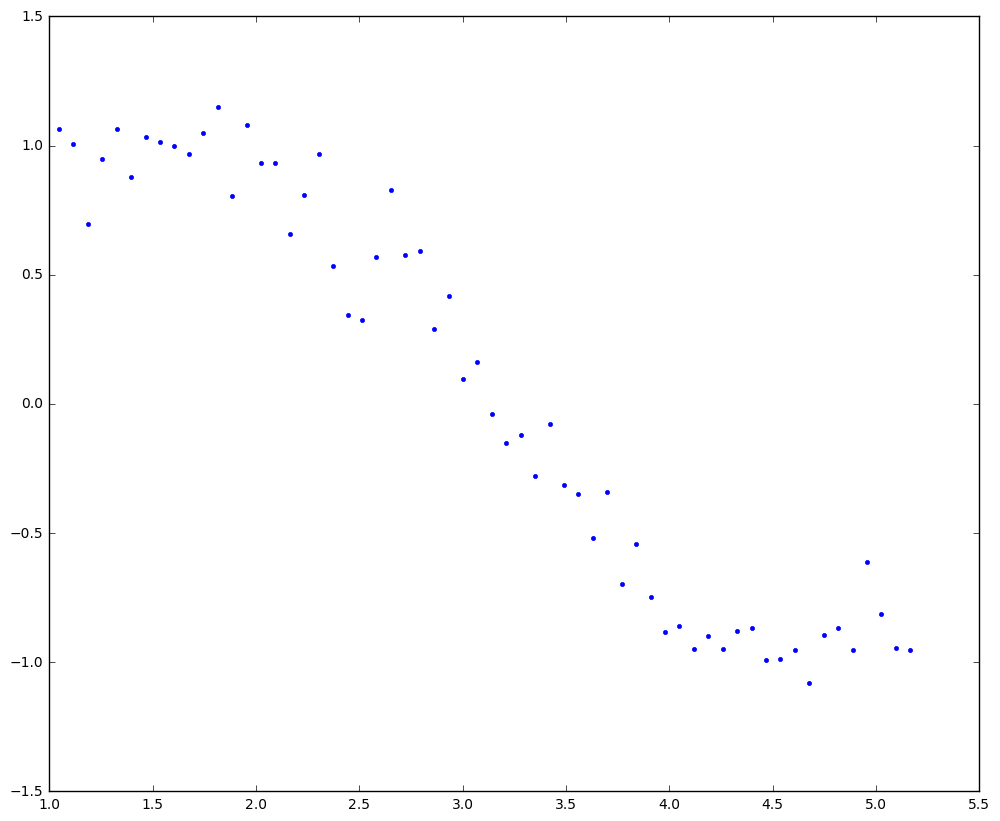

In [1]:
# Необходимое импортирование модулей
%matplotlib inline

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

#Задаем размер графика
rcParams['figure.figsize'] = 12, 10

x = np.array([i*np.pi/180 for i in range(60,300,4)])
# Определяем массив со значениями углов от 60 до 300 градусов в радианах

np.random.seed(10)  
#Генератор случайных чисел


y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y']) # Для удобства используется pandas

plt.plot(data['x'],data['y'],'.')

Как можно заметить, это напоминает синусоиду, но не в точности (из-за присутствия шума). Мы будем использовать это как пример для тестирования различных сценариев.

Попытаемся оценить синусоиду с использованием полиномиальной регрессии со степенями $x$ от 1 до 15. К таблице добавим столбец для каждой степени.

In [2]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


Сейчас, мы имеем все 15 степеней, поэтому можем сделать 15 различных линейных регрессионных моделей с каждой моделью, содержащей переменные со степенями $x$ от $1$ до конкретного числа модели. Например, множество атрибутов для модели $8$ будет следующим: $\left\{ x, x_2, x_3, … ,x_8 \right\} $.

Для начала, определим общую функцию, которая принимает на вход требуемую максимальную степень $x$ (например, $p$) и возвращает список, содержащий: 
[ RSS модели, $w_0$, $w_1$, $w_2$, \ldots, $w_p$ ].

RSS - сумма квадратов остатков между предсказанным и фактическим значениями в тренировочной выборке.

In [3]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

Эта функция не строит модели для всех степеней, а возвращает RSS и коэффициенты для всех моделей.
Итак, мы сделали 15 моделей и сравнили результаты. Для легкости анализа, сохраним все результаты в виде Pandas DataFrame и построим 6 моделей.

Мы ожидаем, что модели с увеличением сложности всё лучше адаптируются к данным и в результате получается всё меньшее значение RSS. Это можно увидеть на графиках, построенных для 6 моделей.


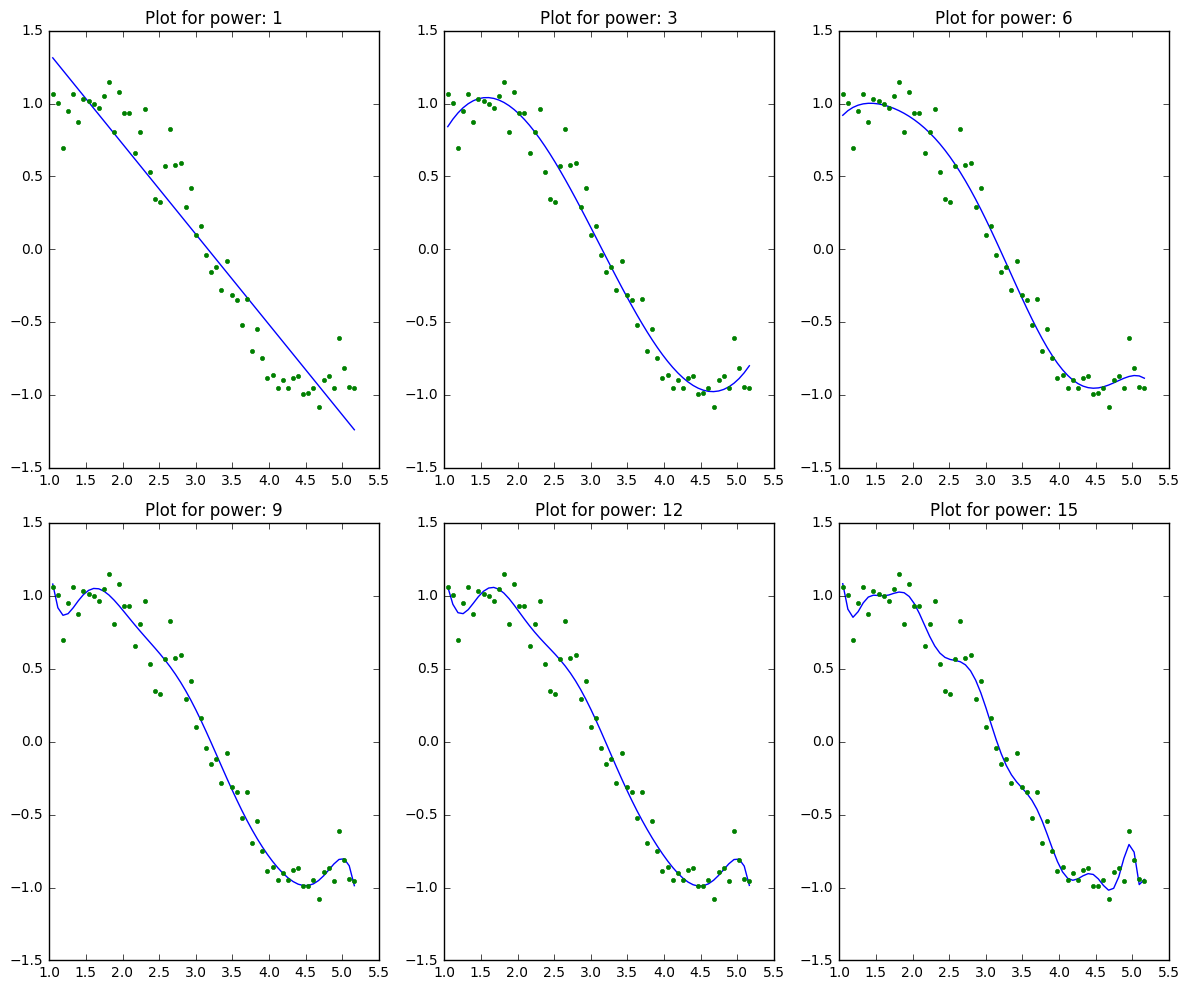

In [4]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

Итак, с увеличением сложности модели она стремится адаптироваться даже к малым отклонениям в тренировочной выборке. Это ведет к **переобучению**.
Но вернемся к рассмотрению влияния на величину весовых коэффициентов. Рассмотрим таблицу.

In [6]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


Ясно видно, что величина весовых коэффициентов **увеличивается с ростом сложности модели**. 

Итак, интуитивно мы пришли к пониманию, что ограничение величины коэффициентов может быть хорошей идеей, чтобы уменьшить сложности модели.

Что означает большая величина коэффициентов?
Это означает, что мы обращаем большое внимание на данный атрибут, т.е. этот атрибут является хорошим предиктором для целевой переменной. Когда он становится слишком большим, алгоритм начинает моделировать слишком сложные отношения для оценки данных и это заканчивается переобучением для конкретной тренировочной выборки.

### Регуляризация

Выше было продемонстрировано, что если веса в линейной модели большие, существует высокий риск переобучения. Чтобы бороться с этим, минимизируется уже не выражение для функционала ошибки $J(w)$, а новый функционал, получаемый прибавлением регуляризатора. Самый простой регуляризатор — квадратичный регуляризатор:
$$ \left\Vert w \right\Vert^2 = \sum_{j=1}^{d} w_j^2$$
В этом случае имеет место следующая задача оптимизации:
$$ J(w) + \lambda \left\Vert w \right\Vert^2 \to \min$$
Таким образом, при обучении будет учитываться также то, что не следует слишком сильно увеличивать веса признаков.

### Коэффициент регуляризации
Введенный выше коэффициент $\lambda$, который стоит перед регуляризатором, называется коэффициентом регуляризации. Чем больше $\lambda$, тем ниже сложность модели. Например, при очень больших его значениях оптимально просто занулить все веса. В то же время при слишком низких значениях $\lambda$ высок риск переобучения, то есть модель становится слишком сложной.

Поэтому нужно найти некоторое оптимальное значение $\lambda$, достаточно большое, чтобы не допустить переобучения, и не очень большое, чтобы уловить закономерности в данных. Обычно $\lambda$ подбирается на кроссвалидации, о которой пойдет речь в ниже.

### Смысл регуляризации

Чтобы понять смысл регуляризации, вместо задачи оптимизации с квадратичным оптимизатором нагляднее рассмотреть задачу условной оптимизации:
$$\begin{cases} J(w) \to \min_w  \\  \left\Vert w \right\Vert^2 \leq C \end{cases}$$

Добавление регуляризатора вводит требование, чтобы решение задачи минимизации искалось в некоторой круглой области с центром в нуле.
![](OverfittingImg\img\Overfitting\img6.png)
<h4 align="center">Рис. 6:  Геометрический смысл условной регуляризации. Красная точка — настоящий оптимум функции, красные линии — линии уровня функции, черная точка — оптимум функции при введенном ограничении.</h4> 

Таким образом, решение задачи с регуляризатором не будет характеризоваться слишком большими значениями весовых коэффициентов.


### Виды регуляризаторов
Рассмотренный выше квадратичный регуляризатор (L2-регуляризатор) является гладким и выпуклым, что позволяет использовать градиентный спуск.

Также существует $L_1$-регуляризатор:
$$\left\Vert w \right\Vert_1 = \sum_{j=1}^{d} \left| w_j \right|$$
который представляет собой $L_1$-норму вектора весов. Он уже не является гладким, а также обладает интерес ным свойством. Если применять такой регуляризатор, некоторые веса оказываются равными нулю. Другими словами, такой регуляризатор производит отбор признаков и позволяет использовать в модели не все признаки, а только самые важные из них.


## Оценка качества алгоритмов. Кросс-валидация
Поговорим об оценке качества алгоритмов и о том, как понять, как поведет себя алгоритм на новых данных.

### Выявление переобучения
Уже было сказано, что переобучение сложно выявить, используя только обучающую выборку: и хороший, и переобученный алгоритмы будут показывать хорошее качество на объектах обучающей выборки. Рассмотренные ранее меры переобученности (значения регуляризаторов), безусловно, можно применять, но они не дают ответа на вопрос, насколько хорошо алгоритм поведет себя на новых данных, то есть какая у него будет доля ошибок на новых данных.

### Отложенная выборка
Самый простой способ оценить качество алгоритма — использование отложенной выборки. В этом случае следует разбить выборку на две части: первая из двух частей будет использоваться для обучения алгоритма, а вторая, тестовая выборка, — для оценки его качества, в том числе для нахождения доли ошибок в задаче классификации, MSE (среднеквадратичной ошибки) в задаче регрессии и других мер качества в зависимости от специфики задачи.

Естественный вопрос — о том, в какой пропорции производить разбиение. Если взять тестовую выборку слишком маленькой, оценка качества будет ненадежной, хотя обучающая выборка будет почти совпадать с полной выборкой. В противоположенном случае, если отложенная часть будет большой, оценка качества будет надежной, но низкое качество алгоритма может свидетельствовать о недостаточном объёме первой, обучающей, части выборки. Обычно выборку разбивают в соотношениях $70/30$, $80/20$ или $0.632/0.368$.

Преимуществом отложенной выборки является то, что обучать алгоритм приходится всего лишь один раз, но при этом результат сильно зависит от того, как было произведено разбиение.

Например, оценивается стоимость жилья по некоторым признакам. И есть особая категория жилья, например двухэтажные квартиры. И если окажется, что все двухэтажные квартиры, которых немного, попали в отложенную выборку, то после обучения алгоритм будет давать на них очень плохое качество, поскольку в обучающей выборке таких объектов не было.

Чтобы решить эту проблему, можно использовать следующий подход: построить $n$ различных разбиений выборки на $2$ части, для каждого разбиения найти оценку качества, а в качестве итоговой оценки качества работы алгоритма использовать усредненное по всем разбиениям значение. Но и в данном случае, поскольку разбиения строятся случайно, нет никаких гарантий, что особый объект хотя бы раз попадет на обучение.

### Кросс-валидация
Более системный подход — кросс валидация. В этом случае выборка делится на $k$ блоков примерно одинакового размера. Далее по очереди каждый из этих блоков используется в качестве тестового, а все остальные — в качестве обучающей выборки.\

После того, как каждый блок побывает в качестве тестового, будут получены $k$ показателей качества. В результате усреднения получается оценка качества по кросс-валидации.

При этом встает вопрос, какое число блоков использовать. Если блоков мало, получаются надежные, но смещенные оценки. В случае большого числа блоков оценки, наоборот, получаются ненадежными (большой разброс оценок), но несмещенными.

Нет конкретных рекомендаций относительно выбора $k$. Обычно выбирают $k = 3; 5; 10$. Чем больше $k$, тем больше раз приходится обучать алгоритм. Поэтому на больших выборках следует выбирать небольшие значения $k$, так как даже при удалении $1/3$ выборки (а она большая) оставшихся данных будет достаточно для обучения.

### Совет: перемешивайте данные в выборке
Часто данные в файле записаны в отсортированном виде по какого-нибудь признаку. Поэтому всегда следует перемешивать выборку прежде, чем производить кросс-валидацию. В ином случае алгоритм будет показывать плохое качество и причина этого будет не так очевидна.

При этом есть задачи, в которых выборку нельзя перемешивать. Это задачи предсказания будущего,
например предсказание погоды на следующий день. В этом случае нужно особо следить за тем, как происходит
деление выборки.

## Выбор гиперпараметров и сравнение алгоритмов

### Гиперпараметры
Гиперпараметрами называются такие параметры алгоритмов, которые не могут быть получены из обучающей выборки при обучении, поэтому их надо подбирать путем многократного обучения алгоритма. Примерами гиперпараметров являются:
• Параметр регуляризации $\alpha$ (при использовании регуляризатора)
• Степень полинома в задаче регрессии с семейством алгоритмов, заданным множеством полиномов определенной степени.

### Сравнение разных алгоритмов
Более общая задача — сравнение разных алгоритмов:
* обученных с разными значениями гиперпараметров;
* использующих различный способ регуляризации;
* настроенных с использованием разного функционала ошибки, например среднеквадратичной ошибки и средней абсолютной ошибки;
* которые принадлежат разным классам алгоритмов.
При сравнении алгоритмов можно использовать как отложенную выборку, так и кросс-валидацию, но при этом следует соблюдать осторожность.

Действительно, пусть 1000 алгоритмов сравниваются по качеству на отложенной выборке. Каждый из 1000 алгоритмов, обученных на обучающей выборке, тестируется на отложенной, и в результате выбирается лучший. Фактически на этом шаге отложенная выборка также становится своего рода обучающей, и возникает проблема переобучения: из большого числа алгоритмов выбирается тот, который лучше всего ведет себя на отложенной выборке, лучше подогнан под нее.

### Улучшенная схема сравнения алгоритмов
Чтобы бороться с этим, следует использовать несколько усовершенствованную схему оценивания качества алгоритмов, а именно все данные нужно будет делить на 3 части (в случае использования отложенной выборки): обучение, валидация и контроль. Каждый из тысячи алгоритмов будет обучен на обучающей выборке, а его качество будет измерено на валидационной. Алгоритм с наилучшим качеством будет проверен на тестовой выборке, чтобы исключить переобучение и проверить алгоритм на адекватность. По сути именно тестовая выборка будет играть роль новых данных.

Если предпочтительно использовать кросс-валидацию, то данные следует разбить на 2 части. Первая из них будет использоваться для обучения алгоритмов и оценки качества с помощью кросс-валидации, после чего лучший алгоритм будет проверен на адекватность на контрольной выборке.



## Регрессия со штрафом, или регуляризованная регрессия в scikit-learn

Итак, еще раз затронем важный класс регресионных моделей - регрессия со штрафом, или **регуляризованная регрессия**.

При обычной регрессии возвращается наилучшая аппроксимация обучающих данных, что может привести к переобучению. Штрафование ознгачает, что мы включаем штраф за чрезмерное доверие к параметрическим данным. Иначе говоря, мы соглашаемся на худшую аппроксимацию ради более простой модели.

Можно взглянуть иначе - считать, что по умолчанию нет никакой связи между входными переменными и выходным прогнозом. Получая данные, мы изменяем это мнение, а добавление штрафа означает, что требуется больше данных, чтобы убедить нас в наличии сильной связи.

### Штрафы $L_1$ и $L_2$

В общем случае, мы имеем матрицу $X$ обучающих данных. Задача состоит в том, чтобы найти вектор весов $w^{*}$. В случае регрессии методов наименьших квадратов он выражается сл. формулой:
$$w^{*} = \arg\min_w \left| y - Xw\right|^{2}$$

То есть требуется найти вектор $w$, который обращает в минимум квадрат расстояния до вектора $y$. 
Добавление штрафа, или регуляризация означает, что мы хотим не только найти лучую аппроксимацию, но и принимаем во внимание значение вектора.
Существует два основных штрафа, применяемые в случае регрессии:
* $L_1$ - к регрессии добавляется сумма абсолютных значений коэффициентов. Тогда имеем формулу: $$w^{*} = \arg\min_w \left| y - Xw\right|^{2} + \lambda \sum_{i}\left|w_i\right| $$
* $L_2$ - к регрессии добавляется сумма квадратов коэффициентов. Формула: $$w^{*} = \arg\min_w \left| y - Xw\right|^{2} + \lambda\sum_{i}w_i^2 $$




$L_1$-регуляризованная регрессия называется также **Lasso-регрессией**, а $L_2$-регуляризованная регрессия называется **гребневой регрессией** (или **Ridge-регрессией**).

На первый взгляд, различие между $L_1$ и $L_2$ несущественное: штраф составляет не сумму абсолютных величин коэффициентов, а сумму их квадратов. Однако результаты могут отличаться довольно сильно.

Как Lasso, так и гребневая регрессия дают меньшие (по абсолютной величине) значения коэффициентов. Однако у метода Lasso есть дополнительное преимущество - многие коэффициенты оказываются в точности равны нулю.
Это означает, что в окончательной модели некоторые признаки не используются, т.е. модель получается **разреженной**. Часто это свойство весьма желательно, поскольку модель осуществляет не только регрессию, но и селекцию признаков.

Штраф сопровождается весовым множителем $\lambda$, контролирующим величину штрафа. Если значение $\lambda$ близко к нулю, модель мало отличается от нерегуляризованной регрессии.

Гребневая регрессия появилась раньше, потому что Lasso очень сложно рассчитать с помощью бумаги и карандаша. Но на современных компьютерах Lasso обсчитывается так же просто, как гребневая регрессия. При желании можно даже объединить два штрафа: сумму абсолютных величин и суммы квадратов, тогда получится уравнение следующего вида:

$$w^{*} = \arg\min_w \left| y - Xw\right|^{2} + \lambda_1 \sum_{i}\left|w_i\right| + \lambda_2\sum_{i}w_i^2  $$

Сочетание $L_1$ и $L_2$ регрессии называется **моделью эластичной сети (ElasticNet-Regression)**.


#### Преимущества $L_1$ и $L_2$ регуляризации

##### Преимущества $L_2$ регуляризации над $L_1$
* Производная регуляризатора $L_2$ легко вычисляется. Поэтому, достаточно легко использовать методы, основанные на градиентном спуске;
* $L_2$ регуляризация оптимизирует штраф математического ожидания (в то время как $L_1$ уменьшает медиану штрафа), что зачастую используется в качестве метрики производительности. Это особенно важно, если в исходных данных отсутствуют *выбросы (outliers)* и вы хотите сохранить общую ошибку достаточно малой;
* Более вероятно то, что решение будет уникальным. Это связано с предыдущим пунктом: в то время как математическое ожидание (mean) является одной величиной, медиана может располагаться в интервале между двумя точками, и поэтому не быть уникальной.
* В то время, как $L_1$ регуляризация даёт вам дает вам разряженный вектор коэффициентов (sparce coefficient vector), неразряженность (non-sparcity) вектора, порождаемого $L_2$ регуляризацией, может улучшить показатели качества классификации (поскольку, вы обрабатываете больше атрибутов, вместо их простого игнорирования);
* $L_2$ ругляризация инварианта относительно операции поворота. Т.е. если в множестве содержится набор точек в пространстве и вы применяете поворот, вы получите те же самые результаты (т.е. дистанции между точками остаются теми же самыми);

#### Преимущества $L_1$ регуляризации над $L_2$
* $L_1$ регуляризация порождает разряженный вектор коэффициентов. Это означает, что $L_1$ регуляризация производил *отбор признаков (feature selection)* и вы можете удалить все атрибуты, с соответствующим весовым коэффициентом равным $0$. Редукция размерности бывает полезна почти во всех случаях;
* $L_1$ регуляризация позволяет оптимизировать медиану. Поэтому, $L_1$ регуляризация нечувствительна к выбросам.

**Литература:**
    
* Building Machine Learning Systems with Python (Authors: Willi Richert, Luis Pedro Coelho)
* An Introduction to Statistical Learning with Applications in R (Authors: Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani), http://www-bcf.usc.edu/~gareth/ISL/
* https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression
* https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
* http://stackoverflow.com/questions/32276391/feature-normalization-advantage-of-l2-normalization


# Машинное обучение без учителя (Unsupervised learning)

## Взяла его ради примера с новостями и многоклассовой классификацией

## Задача кластеризации

### Обучение на размеченных данных

В задачах обучения на размеченных данных, которые рассматривались в прошлом курсе, существовала некоторая целевая зависимость:
$$x \to y,$$
где $y$ — значение прогнозируемой величины (в случае задачи регрессии) или метка класса (в случае задачи классификации). 

По обучающей выборке, которая состоит из множества объектов $x_1, \ldots, x_l$ и ответов на них $y_1, \ldots, y_l$ требовалось спрогнозировать ответы для объектов $x_{l+1}, \ldots, x_{l+u}$ тестовой выборки. 

Фактически, ставилась задача приблизить целевую зависимость некоторой функцией $a(x)$:
$$a(x) \sim y.$$

### Задача кластеризации

В задаче кластеризации обучающая выборка  $x_1, \ldots, x_l$  состоит только из объектов, но не содержит ответы на них, а также одновременно является и тестовой выборкой. Требуется расставить метки $y_1, \ldots, y_l$ таким образом, чтобы похожие друг на друга объекты имели одинаковую метку, то есть разбить все объекты на некоторое количество групп.
На рис. 1 приведен пример задачи кластеризации.

![](img/clustering/img1.png)

Задачу кластеризации также можно представить как восстановление отображения $x\to y$.


### Метрики качества в задаче классификации

Для измерения качества кластеризации требуется ввести так называемые метрики качества.

Пусть $F_0$ - среднее расстояние между объектами в кластераз (должно быть как можно меньше), а $F_1$ - среднее расстояние между объектами из разных кластеров (должно быть как можно больше).

Формально:

$$F_0 = \frac{\sum_{i<j}\lbrack y_i=y_j \rbrack \rho(x_i, x_j)}{\sum_{i<j} \lbrack y_i = y_j \rbrack} \to \min $$

$$F_1 = \frac{\sum_{i<j}\lbrack y_i \neq y_j \rbrack \rho(x_i, x_j)}{\sum_{i<j} \lbrack y_i \neq y_j \rbrack} \to \max $$

Очевидно, что при оптимизации только одной из метрик $F_0$ или $F_1$ учтен будет всего лишь один из факторов. Учесть сразу оба можно, например, сл. образом:

$$\frac{F_0}{F_1} \to \min $$


### Примеры задач кластеризации

В зависимости от специфики задачи и особенностей используемых в задаче данных задачи кластеризации могут сильно отличаться. Может, например, отличаться форма, размер и иерархия кластеров, а также тип задачи (основная или побочная) и тип классификации (жесткая или мягкая).

#### Различные формы кластеров
На рисунке 2 приведены примеры различных форм кластеров.

![](img/clustering/img2.png)

Как можно увидеть, кластеры могут иметь совершенно различную форму

A) В простейшем случае кластеры представляют собой «сгустки точек» и могут быть легко выделены окружностью.

B) Иногда кластеры принимают более сложную форму, но все также могут быть легко выделены.

C) Возможен случай, когда между кластерами есть такие точки, которые сложно отнести к определенному кластеру.

D) Кластеры могут представлять собой вытянутые ленты. В этом случае можно найти пару точек из разных кластеров, которые находятся ближе некоторой пары из одного кластера. Такие кластеры можно выделить, добавляя к строящемуся кластеру близжайшую точку.

E) Кластеры могут плавно перетекать друг в друга. В этом случае описанная для предыдущего случая стратегия уже не работает.

F) Кластеры могут быть образованы по некоторому закону, который все же не известен.

G) Кластеры могут пересекаться. В этом случае достаточно сложно определить, к какому кластеру относятся некоторые объекты.

Ну и **кластеров может вовсе не быть**.

#### Иерархия и размер кластеров

В практических задачах бывает нужно, чтобы внутри какого-нибудь большого кластера были кластеры меньшего размера. Например, в задаче кластеризации статей с сайта «habrahabr.ru», кластер «IT» может включать в себя кластер «Алгоритмы», внутри которого могут быть кластеры «Методы машинного обучения» и «Алгоритмы и структуры данных».

![](img/clustering/img3.png)
Также может различаться размер кластеров. Так, при кластеризации новостей по содержанию возможны следующие 3 варианта постановки задачи, которые отличаются размерами выделяемых кластеров:
* В один и тот же кластер попадают новости на одну тему. Например, в первый кластер попадут все спортивные новости и так далее.
* В один и тот же кластер попадают новости об одном и том же большом событии. Например, в один кластер попадут все новости про олимпиаду в городе Сочи.
* В один и тот же кластер попадают тексты об одной и той же конкретной новости, например про открытие олимпиады в сочи.

#### Основная или вспомогательная задачи
В зависимости от цели задача кластеризации может быть:
* **Основной**, когда полученная кластеризация не используется для решения какой–либо другой задачи.
* **Вспомогательной**, если задача классификации является промежуточной при решении другой задачи.
Рассмотренная выше задача кластеризации новостей является основной задачей.

Задача сегментации целевой аудитории появляется, если для покупателей из разных групп требуется использовать разную маркетинговую кампанию.
![](img/clustering/img4.png)

Если для покупателей из разных групп требуется предлагать различный товар, то в этом случае задача кластеризации является вспомогательной по отношению к задаче рекомендации. Если задача сегментации решается для целей аналитики, то она, в свою очередь, будет основной.

Другой пример вспомогательной задачи встречается при распознавании символов. Каждый символ может быть написан множеством различных способов, то есть иметь различные начертания: жирный, курсив и т.д.

![](img/clustering/img5.png)

В этом случае полезно сначала решить вспомогательную задачу кластеризации символов по их начертанию, а затем уже использовать полученную информацию для распознавания самих символов.

#### Жёсткая или мягкая кластеризация

В зависимости от того, может ли относиться объект сразу к нескольким кластерам бывает:
* **Жесткая кластеризация**: объект может быть отнесен только к одному из кластеров.
* **Мягкая кластеризация**: объект может быть отнесен к нескольким кластерам сразу (с некоторыми весами).

Например, текст про применение кластеризации в области финансов в случае жесткой кластеризации по темам (финансы, анализ данных, кластеризация) будет отнесен к теме «кластеризация», а в случае мягкой кластеризации — ко всем трем темам с разными весами: к теме «кластеризация» с весом 0.5, к теме «анализ данных» с весом 0.3 и к теме «финансы» с весом 0.2.


## Типы кластеризации

Итак, задача кластеризации субъективна, и это означает, что она может использоваться для достижения различных целей. 
Каждая метоика следует разным наборам правил для определения понятия "похожести" (similarity) среди точек из набора данных.

На данный момент известно более ста алгоритмов кластеризации, но всего лишь несколько алгоритмов являются достаточно широко распространенными.

**Connectivity models** Эти модели основываются на представлении, что точкие, расположенные ближе в пространстве данных, имеют больше сходства друг с другом, чем точки данных, лежащие дальше.
Эти модели могут следовать двум подходам. Первый подход начинает с классификации всех точек в отдельные кластера, а затем их агрегации по мере уменьшения расстояния.
Во втором подходе все точки классифицируются как один кластер, и затем он разбивается по мере увеличения расстояния. Кроме того, выбор функции расстояния **субъективен**. Эти модели легко интерпретировать, но их существенным недосттком является масштабируемость для обработки огромных наборов данных. Примерами этих моделей является алгоритмы иерархической кластеризации и его варианты.

**Centroid models** Эти итеративные алгоритмы кластеризации используют представление о схожести как производной от близости точек к центроиду кластера. Примером алгоритма из этой категории является популярный алгоритм K-Means. В этих моделях требуется знаниче числа кластеров, на которые мы хотим разбить данные. А это значит, что достаточно важно иметь априорное знание о наборе данных. Эти модели работают итеративно, для нахождения некоторого локального минимума.

**Distribution models**. Эти модели кластеризации основываются на понятии того, насколько вероятно то, что данные в кластере будут принадлежать тому же распределению (например, Гауссовскому (нормальному) распределению). Эти модели зачастую страдают от переобучения. Наверное, самым известным примером алгоритма этого класса является EM-алгоритм (Expectation-Maximization), использующий многомерные нормальные распределения.

**Density Models**. Эти модели ищут пространства данныз для областей с *различной плотностью точек* в этом пространстве. Они "изолируют" области с разными областями плотности и назначают точкам внутри этих областей соответствующий кластер.
Примерами алгоритмов этой модели являются алгоритмы DBSCAN и OPTICS.

## Идея двух простых алгоритмов

Теперь рассмотрим "абстрактно" как работают два популярных алгоритма кластеризации.
Начнем наше рассмотрение с алгоритма K-Means.

### K-means clustering

K-means представляет собой итеративный алгоритм кластеризации, целью которого является поиск локального максимума в каждой итерации. 

Этот алгоритм можно разбить на 5 шагов.

1. Определение желаемого числа кластеров. Рассмотрим k=2 для 5 точек в двумерном пространстве.
![](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-2-293x300.png)


2. Случайно выбираются $k$ случайных точек. Эти точки играют роль центров кластеров (центроидов кластеров).
![](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-3.png)

3. Каждая точка относится к тому кластера, расстояние до центра которого минимально. 
![](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-4.png)

4. Повторно вычислить центроиды - среднее арифметическое всех точек, попавших в кластер 
![](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-5.png)

5. Шаги 3 и 4 повторяются пока не наступило условие для остановки. Мы будем повторять шаги 3 и 4 пока не достигнем глобального оптимума. Это может случиться когда точки не будут "переключаться" между разными кластерами за последовательные итерации. Это является сигналом к терминации алгоритма (если явно не указано иное).

### Иерархическая кластеризация

Иерархическая кластеризация является алгоритмом, который выстраивает иерархию кластеров. Этот алгоритм начинается с того, что каждой точке в пространстве данных назначается свой собственный кластер. Затем два ближайщих кластера объединяются в один кластер. В конце концов, алгоритм останавливается лишь тогда, когда остается только один кластер.

Результаты иерархической кластеризации отображаются с использованием т.н. **дендрограммы**. Дендрограмма может быть интерпретирована как:
![](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-6.png)

На рисунке, мы начинаем с 25 точек, и каждой назначается свой собственный кластер. Два ближайших кластера затем объединяются до тех пор, пока не останется единственный кластер (вверху). Высота на дендрограмме на которой два кластера объединются представляет дистанцию между двумя кластерами в пространстве данных.

Глядя на дендрограмму мы можем принять решение о необходимом числе кластеров. Выбор числа кластеров является числом вертикальных линий в дендрограмме, когда мы проводим горизонтальную линию, которая пересекает максимальное расстояние по вертикали без пересечения кластеров.

На примере ниже, оптимальным числом кластеров является 4, так как горизонтальная линия на дендрограмме ниже охватывает максимум вертикального расстояния AB.

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-7.png)

Две важнейших вещи, которые нужно знать о иерархической кластеризации:
* Алгоритм иерархической кластеризации реализует подход "снизу вверх". Также возможно следовать подходу "сверху вниз", который начинается с того, что все точки назначаются одному кластеру, и рекурсивно выполняется разбиение до тех пор, пока каждая точка не будет находится в собственном кластере.
* Решение о объединении двух кластеров берется на ьазе близости этих кластеров. Есть несколько метрик для определения близости между двумя кластерами:
* Евлидова метрика 
* Квадратичная Евклидова метрика
* Манхеттенская метрика
* Максимальное расстояние
* Расстояние Махалонобиса

## Разница между K-Means и иерархической кластеризации

* Иерархическая кластеризация не может достаточно хорошо обрабатывать огромные наборы данных, в то время как K-Means успешно справляется с этой задачей. Это обусловлено временной сложностью алгоритма K-Means, которая является линейной, т.е. $O(n)$, в то время, как сложность иерархической кластеризации - квадратичная $O(n^2)$;
* В кластеризации методом K-Means, поскольку мы начинаем со случайного выбора кластеров, результат, порожденный алгоритмом может отличаться при нескольких запусках. В этом недетерминированность алгоритма. В тоже время, результаты алгоритма иерархической кластеризации одни и те же;
* K-Means достаточно хорошо работает, когда форма кластеров является гипер сферической (круг в двухмерном пространстве, сфера в трехмерном и т.д.);
* Кластеризация K-Means требует априорного знания $K$, т.е. знания числа кластеров, на которые мы хотим разделить исходные данные. Но мы можем остановиться на любом числе кластеров, при интерпретации дендрограммы иерархической кластеризации.

## Знакомство с методами кластеризации

Итак, кластеры могут иметь разный вид в зависимости от специфики задачи. Поэтому универсального алгоритма кластеризации не существует. При этом использование различных алгоритмов кластеризации в одной и той же задаче может давать совершенно разный ответ.

Например, ниже показаны результаты метода k_means и EM-алгоритма на модельной выборке "Mouse dataset".

![](img/clustering/img6.png)

### Метод k-средних (k-Means)
Простейшим методом кластеризации является $k$-средних (k-Mans), где $k$ - число кластеров, которые требуется выделить. 
Предполагается, что число $k$ известно.

![](img/clustering/img7.png)

В начале работы алгоритма выбираются $k$ случайных точек. Это точки играют роль центров кластеров: каждая точка будет отнесена к тому кластеру, расстояние до центра которого минимально. После этого выполняются итерации: на каждом шаге в качестве нового центра кластера выбирается среднее арифметическое всех точек, попавших в этот кластер, и обновляются метки кластеров ля точек в зависимости от близости к новым центрам кластеров. Итерации выполняются, пока не будет получен удовлетворительный результат.



### Метод Bisect Means
Если необходимо подобрать число кластеров, можно воспользоваться методом Bisect Means, который является модификацией метода k–средних.

![](img/clustering/img8.png)

Метод заключается в следующем. На первом шаге применяется метод 2-means, то есть метод k–средних в случае двух кластеров. После этого для точек из каждого из получившихся кластеров, если это необходимо, также запускается 2-means и кластер разбивается на два. Процедура продолжается до тех пор, пока есть такой кластер, который нужно дробить.


### EM-алгоритм

EM–алгоритм, другой метод кластеризации, заключается в максимизации правдоподобия. Он основан на том, что плотность вероятности распределения точек $p(x)$ выборки представляет собой взвешенную сумму плотностей вероятности $p_j(x)$ в каждом кластере:

$$p(x) = \sum_{j=1}^{K}w_{j}p_{j}(x),$$
где веса $w_j \geq 0$, а также $\sum_{j=1}^{K}w_j=1$.

При этом все $p_j(x)$ выбираются из некоторого семейства распределений $\phi(\theta; x)$ с параметром $\theta$:
$$p_j(x) = \phi(\theta_j; x).$$

В качестве $\phi(\theta_j; x)$ часто выбирают семейство нормальных распределений.

Алгоритм заключается в последовательном выполнении двух шагов:

**E-шаг**: Вычисляются вспомогательные переменные:
$$g_{ji}=p(\theta_j \mid x_i ) = \frac{w_j p_j(x_i)}{p(x_i)}.$$
Эти параметры фиксируются (так как в этом случае упрощается решение задачи максимизации).

**M-шаг**: При зафиксированных $g_{ji}$ решение задачи максимизации правдоподобия может быть найдено согласно:
$$w_j = \frac{1}{N}\sum_{i=1}^{N}g_{ij}, \theta_j = \arg\max_{\theta}\sum_{i=1}^{N}g_{ji}\ln \phi(\theta, x).$$

Объект относится к кластеру $j$, для которого максимально значение $p(\theta_j \mid x_i)$.

#### Алгоритм EM: замечание
Действительно, данная задача представляет собой задачу разделения смеси распределений:
$$p(x) = \sum_{j=1}^{K}w_jp_j(x), p_j(x)=\phi(\theta_j ; x), $$

в которой нужно оценить веса $w_j$ и параметры $\theta_j$ отдельных компонентов. Эту задачу можно было бы попытаться решить напрямую, как 
$$w, \theta = \arg\max_{\theta, w} \ln p(x_i).$$
Но решение такой задачи найти крайне сложно и поэтому, в алгоритме EM-дополнительно фиксируются $g_{ij}$.

Полное описание алгоритма достаточно сложное (не говоря уже о его понимании), но оно приведено в книге: 
*Elements of Statistical Learning* (link: https://statweb.stanford.edu/~tibs/ElemStatLearn/ ).

![](https://cs7058.userapi.com/c836628/v836628756/38af0/HHfe53fLRXo.jpg)


###  Методы основанные на плотности точек
Существуют так называемые методы, основанные на плотности точек (density-based), которые используют следующую идею. Для каждой точки выборки рассматривается её окрестность, причем:
* Точка называется основной, если в ее окрестности много других точек (больше, чем некоторое число).
* Точка называется пограничной, если в ее окрестности мало других точек, но среди них есть основная.
* В ином случае точка называется шумовой.


![](img/clustering/img9.png)
Принцип работы алгоритма DBScan: изображены основная, пограничная и шумовые точки.

DBSCAN — это один из density-based методов, который состоит из следующих шагов:
1. Разделить точки на основные, пограничные и шумовые.
* Отбросить шумовые точки.
* Соединить основные точки, которые находятся на расстоянии " друг от друга.
* Каждую группу соединенных основных точек объединить в свой кластер.
* Отнести пограничные точки к соответствующим им кластерам.

### Иерархическая кластеризация
Еще один (уже вкратце разобранный) подход к кластеризации — иерархическая кластеризация. Он заключается в введении понятия расстояния между кластерами и состоит в следующем.
В начале каждая точка относится к своему собственному кластеру. На каждом шаге алгоритма те кластеры, расстояние между которыми минимально, объединяются в один. Постепенно все кластеры объединяются в один, а процесс их объединения представляет собой дерево. Его можно изобразить с помощью так называемых дендрограмм. По горизонтальной оси дендрограммы отложено расстояние между кластерами в момент слияния, а по вертикальной — точки выборки.
![](img/clustering/img10.png)

В зависимости от требуемого числа кластеров, это дерево необходимо обрезать на определенной глубине.

Важно, что изменение числа кластеров не требует перезапуска алгоритма, как это потребовалось бы в методе k-means.

В биологии систематизация видов позволяет глубже понять их происхождение, представляет собой деление видов на определенные группы и этим сильно напоминает рассмотренную выше иерархическую кластеризацию.
![](img/clustering/img11.png)

Расстояние между кластерами можно вводить несколькими разными способами:
* как среднее расстояние между объектами кластеров (Average linkage).
* как максимальное расстояние между объектами кластеров (Complete linkage).
* как минимальное расстояние между объектами кластеров (single linkage).

![](img/clustering/img12.png)


### Обзор методов кластеризации
Теперь можно систематизировать основные методы кластеризации. По получающейся структуре кластеров методы делятся на:
* Иерархические, то есть характеризующиеся сложную структуру кластеров. Среди них выделяют:
– Агломеративные, которые характеризуются последовательным объединением кластеров.
– Дивизионные, которые заключаются в последовательном делении одного кластера, состоящего из всех объектов, на меньшие.
* Плоские (не иерархические).
Также некоторые методы кластеризации лучше работают на кластерах определенной формы. 
Также некоторые методы кластеризации позволяют сделать и жесткую, и мягкую кластеризацию, а некоторые — только жесткую.

# Пример: Кластеризация текстов

## Выборка и признаки

Применим методы кластеризации на практике, на приммере выборки 20newsgroups из пакета sklearn. Эта выборка включает в себя множество писем на различные темы.


In [2]:
from sklearn.datasets import fetch_20newsgroups

train_all = fetch_20newsgroups(subset='train')
print(train_all.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


В результате его исполнения был выведен список доступных тем. Для простоты ограничимся несколькими сильно различающимися темами.

In [3]:
simple_dataset = fetch_20newsgroups(subset='train',
                                   categories = ['comp.sys.mac.hardware',
                                                'soc.religion.christian',
                                                'rec.sport.hockey'])


Просмотреть письмо, содержащиеся в обучающей выборке можно следующим образом:

In [4]:
# Вывести первое письмо в выборке
print(simple_dataset.data[0])


# Вывести последнее письмо в выборке
print(simple_dataset.data[-1])


# Вывести предпоследнее письмо в выборке
print(simple_dataset.data[-2])

From: erik@cheshire.oxy.edu (Erik Adams)
Subject: HELP!!  My Macintosh "luggable" has lines on its screen!
Organization: Occidental College, Los Angeles, CA 90041 USA.
Distribution: comp
Lines: 20

Okay, I don't use it very much, but I would like for it to keep working
correctly, at least as long as Apple continues to make System software
that will run on it, if slowly :-)

Here is the problem:  When the screen is tilted too far back, vertical
lines appear on the screen.  They are every 10 pixels or so, and seem
to be affected somewhat by opening windows and pulling down menus.
It looks to a semi-technical person like there is a loose connection
between the screen and the rest of the computer.

I am open to suggestions that do not involve buying a new computer,
or taking this one to the shop.  I would also like to not have
to buy one of Larry Pina's books.  I like Larry, but I'm not sure
I feel strongly enough about the computer to buy a service manual
for it.

On a related note:  what

Темы писем содержатся в массиве 
    target:

In [5]:
simple_dataset.target

array([0, 0, 1, ..., 0, 1, 2], dtype=int64)

Полное количество объектов в выборке:

In [7]:
print(len(simple_dataset.data))

1777


В качестве признаков можно использовать частоты слов 
    CountVectorizer
или взвешенные частоты слов 
    TfidfVectorizer.
Следующий код подключает необходимые функции:

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

В обоих случаях, чтобы обеспечить небольшое количество признаков,ь можно установить максимальный и минимальный пороги для документной частоты слов:

In [60]:
vectorizer = CountVectorizer(max_df=500, min_df=10)

Поскольку слова, которые встречаются почти во всех письмах или, наоборот, очень редко, вряд ли будут полезны, но, отбросив их, можно существенно упростить задачу с вычислительной точки зрения.

После этого можно создать матрицу "объект-признак":

In [61]:
matrix = vectorizer.fit_transform(simple_dataset.data)


Размер этой матрицы при данном способе построения признакового описания:

In [62]:
print(matrix.shape)

(1777, 3767)


Т. е. в данном случае используется 3767 признаков. Получить список созданных признаков можно сл. командой:

In [63]:
vectorizer.get_feature_names()

['00',
 '000',
 '01',
 '02',
 '03',
 '030',
 '0358',
 '04',
 '040',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '104',
 '105',
 '106',
 '109',
 '11',
 '110',
 '112',
 '113',
 '119',
 '12',
 '120',
 '126',
 '127',
 '128',
 '129',
 '13',
 '132',
 '133',
 '14',
 '140',
 '15',
 '150',
 '152',
 '16',
 '160',
 '17',
 '170',
 '175',
 '18',
 '180',
 '19',
 '1987',
 '1988',
 '1989',
 '199',
 '1990',
 '1991',
 '1992',
 '1993',
 '1993apr14',
 '1993apr15',
 '1993apr16',
 '1993apr18',
 '1993apr19',
 '1993apr20',
 '1993apr5',
 '1993apr6',
 '1d17',
 '1d20',
 '1st',
 '20',
 '200',
 '2000',
 '203',
 '21',
 '210',
 '22',
 '23',
 '230',
 '24',
 '240',
 '241',
 '25',
 '253',
 '256',
 '25mhz',
 '26',
 '27',
 '28',
 '286',
 '29',
 '2nd',
 '30',
 '300',
 '30602',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '386',
 '39',
 '3rd',
 '40',
 '400',
 '403',
 '408',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '486',
 '49',
 '4mb',
 '4th',
 '50',
 '500',
 '51'

#### Метод K-средних

Рассмотрим в действии метод кластеризации K-средних:

In [64]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
preds = model.fit_predict(matrix.toarray())

Здесь
    random_state
полностью определяет случайные значения, которые используются в методе K-средних. Это необходимо для обеспечения воспроизводимости результатов.

Результат выполнения алгоритма и истинные значения ответов:

In [65]:
# Результат кластеризации
print(preds)

[0 0 0 ..., 0 0 0]


In [66]:
# Истинные ответы
print(simple_dataset.target)

[0 0 1 ..., 0 1 2]


Проведем перенумерацию кластеров:

In [67]:
mapping = {2 : 1, 1: 2, 0: 0}
mapped_preds = [mapping[pred] for pred in preds]

Теперь подсчитаем долю случае, когда тема была определена некорректно:

In [68]:
print(float(sum(mapped_preds != simple_dataset.target)) / len(simple_dataset.target))


0.6741699493528419


Воспользуемся классификатором на тех же данных:

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
clf = LogisticRegression()
print(cross_val_score(clf, matrix, simple_dataset.target).mean())

0.978039526759


## To be continued...

## Литература:
* https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/
* https://www.analyticsvidhya.com/blog/2013/11/getting-clustering-right/
* https://www.analyticsvidhya.com/blog/2013/11/getting-clustering-right-part-ii/
* Coursera Курс "Поиск структуры в данных" специализации Анализ данных : https://www.coursera.org/learn/unsupervised-learning
* Introduction to Statistical Learning
* Elements of Statistical Learning